# ***DSCI 100 Final Report (002 Group 12)***


# ***Player Characteristics: How Experience and Playtime Impact Newsletter Subscriptions***

by **Kenneth Ahn, Alex Ronczewski, Ryan Zhang, Natalie Viegas**


## **Introduction**


In this report, a dataset based on UBC’s minecraft server “Plaicraft” was created and distributed to DSCI students to answer questions regarding the results of the dataset. Led by Frankwood and a UBC Computer Science research group, this project examines player interactions in the realm of gaming. Delving deeper into the “Players” dataset, there are 7 variables, and 196 observations. The variables describe different aspects of the data acquired from “Plaicraft”. These variables include “Experience”, “Subscribe”, "hashedEmail”,  “played_hours”, “name”, “gender” and “Age”. This dataset was sourced from Github. 

We decided to focus on the following broad question: 
**"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?".**

Our report aims to address the following specific question:

**"Can experience level and hours played predict whether a player subscribes to a game-related newsletter in the "Players" dataset?"**


## **Methods & Results**


In [1]:
#Load the necessary libraries and set the matrix max rows to 6. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Load the dataset into R using the raw file from Github

players <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### Table 1: Variable Descriptions for the Players Dataset

This dataset has 196 observations and 7 Variables. 

| Variable Name | Variable Type | Description                                                         | 
|---------------|---------------|---------------------------------------------------------------------|
|experience     |character      |Player's experience level (Beginner, Amateur, Regular, Veteran, Pro) |
|subscribe      | logical       | Whether the player has subscribed to the newsletter (TRUE or FALSE) |
|hashedEmail    | character     |   Player's identifier                                               |
|played_hours   |  double       | Player's total number of hours played                               |
|name           | character     |   Player's name                                                     |
|gender         |  character    |   Player's gender (Male or Female)                                  |
|Age            |    double     |    Player's age                                                     |

In [3]:
#Players dataset summary statistics

#Summary statistics for played_hours and age

players_numerical_data_summary <- players |>
summarize (
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    median_played_hours = median (played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE), 
    max_played_hours = max(played_hours, na.rm = TRUE), 
    mean_age = mean (Age, na.rm = TRUE), 
    median_age = median (Age, na.rm = TRUE), 
    min_age = min (Age, na.rm = TRUE), 
    max_age = max (Age, na.rm = TRUE)
    )

#Summary statistics for gender

gender_summary <- players |>
count (gender)

#Summary statistics for experience

experience_summary <- players |>
count (experience)

#Summary statistics for subscriptions

subscribe_summary <- players |>
count (subscribe)

players_numerical_data_summary
gender_summary
experience_summary
subscribe_summary

#More specific summary stats for our question, we can use these if we want not necessary. 

#Distribution of experience levels of players
experience_summary <- players |> 
  count(experience, name = "count")
#experience_summary

experience_plot <- ggplot(players, aes(x = experience)) +
  geom_bar(fill = "lightblue") +
  labs(
    title = "Player Experience Levels",
    x = "Experience Level",
    y = "Count") 

#experience_plot

#Distribution of subscriptions for our question levels of players

subscription_summary <- players |> 
  summarize(subscribed_players = sum(subscribe, na.rm = TRUE),
    not_subscribed_players = sum(!subscribe, na.rm = TRUE))

#subscription_summary



mean_played_hours,median_played_hours,min_played_hours,max_played_hours,mean_age,median_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0.1,0,223.1,20.52062,19,8,50


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
⋮,⋮
Other,1
Prefer not to say,11
Two-Spirited,6


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


### **Tidying the data**

Possible issues

`For players.csv`
- Remove NA data from age.
- Remove NA from experiece if it does exist
- Make sure that the data is in a tidy format
- Convert Gender and Experience to a factor variable
- Change experience to a qualitative variable from 1-5

In [4]:
#Cleaning for players.csv
players_clean <- players |> 
  filter(!is.na(Age)) |>  
  mutate(
    experience = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur" ~ 2,
      experience == "Regular" ~ 3,
      experience == "Veteran" ~ 4,
      experience == "Pro" ~ 5) |> as.factor(),
    subscribe = factor(subscribe, levels = c(TRUE, FALSE))) |> 
  filter(!is.na(experience))  
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
5,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
4,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
4,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
2,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
2,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


After cleaning the data we can continue with the next steps of our data analysis. 

### **Data Analysis**

Recall our specific research question: **"Can experience level and hours played predict whether a player subscribes to a game-related newsletter in the "Players" dataset?"**

We have a binary classification based on a predictive variable. We will use the K-Nearest Neighbours technique. We chose this rather than other DSCI 100 techniques like linear regressions because in the dataset we have 194 observations which is quite small, and we are predicting a binary outcome (yes/no) as opposed to something continious. First, let's use a bar plot to look at the relationship between experience levels and amount subscribed. 

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


NULL

Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


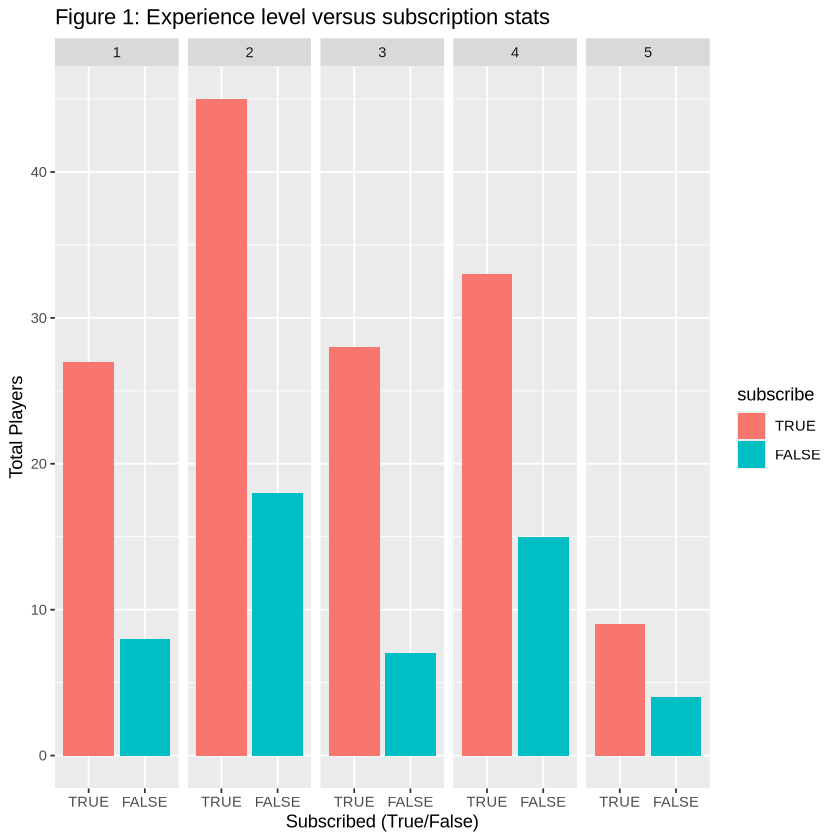

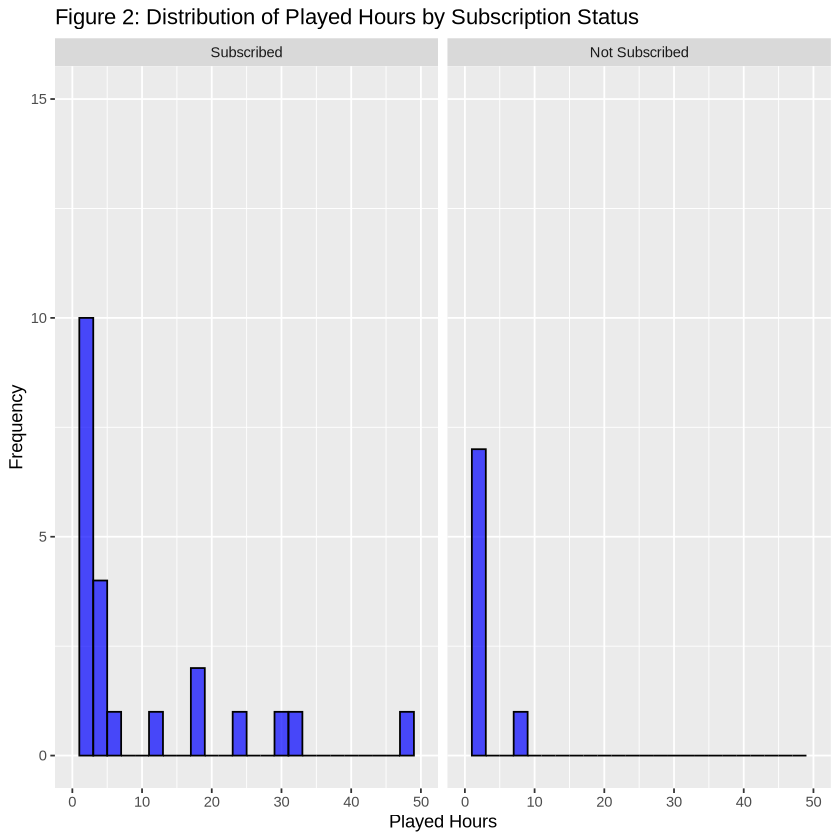

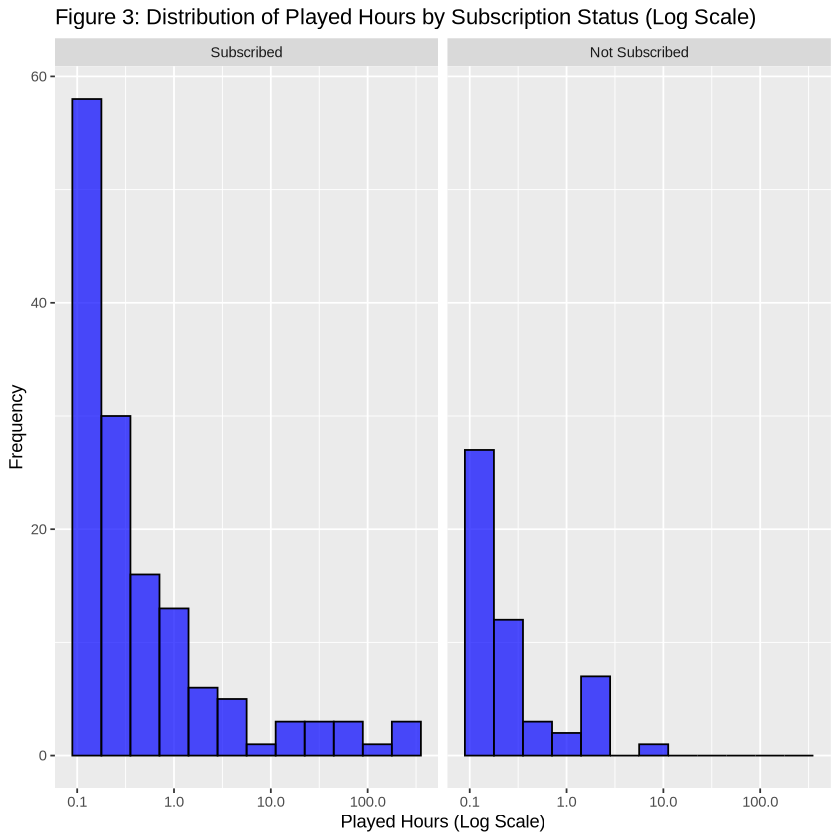

In [24]:
#Experience level and subscription stats
experience_subscribed_amount <- players_clean |>
    group_by(experience, subscribe) |>
    summarise(total = n())

experience_subscribed_plot <- experience_subscribed_amount |>
    ggplot(aes(x = subscribe, y = total, fill = subscribe)) +
    geom_bar(stat = "identity") +
    facet_grid(~experience) +  
    xlab("Subscribed (True/False)") +
    ylab("Total Players") +
    ggtitle("Figure 1: Experience level versus subscription stats")
    labs(fill = "Subscription Status") +
    scale_y_continuous(expand = c(0, 0)) +
    theme(text = element_text(size = 11))
experience_subscribed_plot

#Hours played and subscription stats visualizations

# Faceted histograms by subscription status, limited to 50 hours
hours_plot <- ggplot(players_clean, aes(x = played_hours)) +
  geom_histogram(binwidth = 2, fill = "blue", color = "black", alpha = 0.7) +
  facet_wrap(~ subscribe, labeller = labeller(subscribe = c("TRUE" = "Subscribed", "FALSE" = "Not Subscribed"))) +
  labs(
    title = "Figure 2: Distribution of Played Hours by Subscription Status",
    x = "Played Hours",
    y = "Frequency") +
  xlim(0, 50) +
  ylim(0, 15) 

hours_plot

hours_plot_2 <- ggplot(players_clean, aes(x = played_hours + 0.1)) +
  geom_histogram(binwidth = 0.3, fill = "blue", color = "black", alpha = 0.7) +
  facet_wrap(~ subscribe, 
             labeller = labeller(subscribe = c("TRUE" = "Subscribed", "FALSE" = "Not Subscribed"))) +
  labs(
    title = "Figure 3: Distribution of Played Hours by Subscription Status (Log Scale)",
    x = "Played Hours (Log Scale)",
    y = "Frequency"
  ) +
  scale_x_log10()
hours_plot_2

Here we can see that for all experience levels most users are subscribed to the newsletter. With experience level 3 having the lowest subscription rate. As for played hours it seems that most people with more played hours are subscribed to the newsletter, but this might also be biased as most of the users are subscibed. 

**KNN with Neighbours = 3** 

First lets look at the regression with neighbours = 3 as that was the inclass standard and see the accuracy, precision and recall to answer if we can predict subscription with Played_hours and experience level. 

In [6]:
#Working New question which KNN can actually be used on Played_hours and experience level
set.seed(12)
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
2,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
2,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
4,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,TRUE,8c9d043ebb3689e679a37bfed30ea96272bcd14689ed2d9fcd68a4ae0c1663bc,0,Lina,Female,17
2,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0,Rhys,Male,20
2,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


NULL

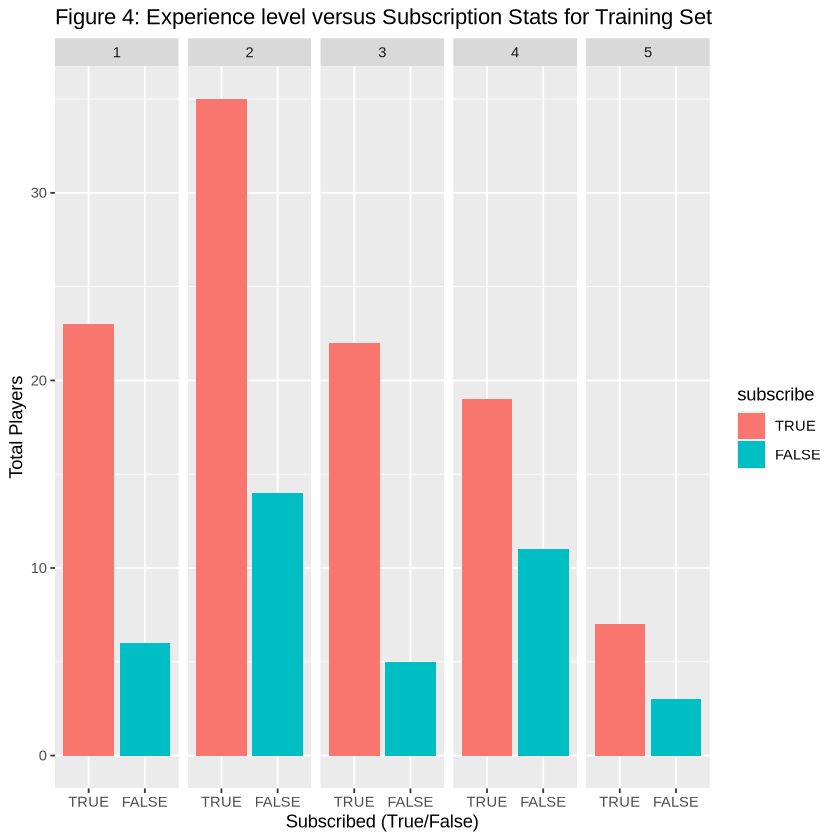

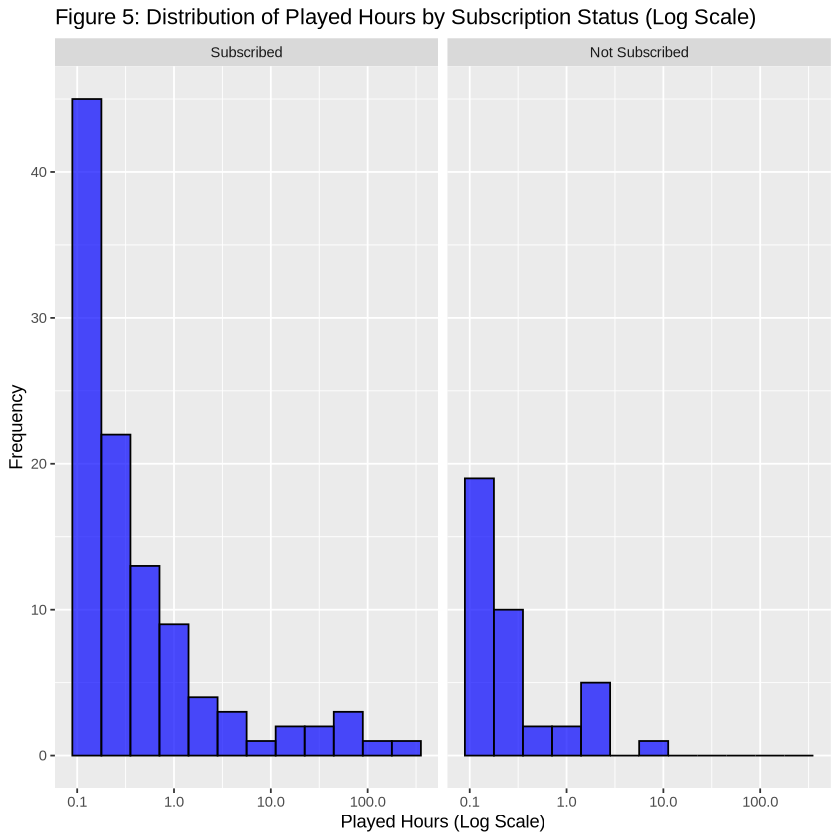

In [25]:
#Visualize training set
set.seed(12)
players_train

experience_subscribed_amount_2 <- players_train |>
    group_by(experience, subscribe) |>
    summarise(total = n())

experience_subscribed_plot <- experience_subscribed_amount_2 |>
    ggplot(aes(x = subscribe, y = total, fill = subscribe)) +
    geom_bar(stat = "identity") +
    facet_grid(~experience) +  
    xlab("Subscribed (True/False)") +
    ylab("Total Players") +
    ggtitle("Figure 4: Experience level versus Subscription Stats for Training Set")
    labs(fill = "Subscription Status") +
    scale_y_continuous(expand = c(0, 0)) +
    theme(text = element_text(size = 11))
experience_subscribed_plot


played_hours_training <- ggplot(players_train, aes(x = played_hours + 0.1)) +
  geom_histogram(binwidth = 0.3, fill = "blue", color = "black", alpha = 0.7) +
  facet_wrap(~ subscribe, 
             labeller = labeller(subscribe = c("TRUE" = "Subscribed", "FALSE" = "Not Subscribed"))) +
  labs(
    title = "Figure 5: Distribution of Played Hours by Subscription Status (Log Scale)",
    x = "Played Hours (Log Scale)",
    y = "Frequency"
  ) +
  scale_x_log10()
played_hours_training

Based on the above, visualizations, the training dataset is reflective of our regular dataset. The proportions are similar meaning that we can continue with our analysis on seed 12. 

Now, we build and apply a KNN classication model to address our research question:

In [8]:
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_train) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)
#players_test_predictions

In [26]:
#First, we will examine accuracy
cat("Result 1: Accuracy of Predictions\n")

players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

Result 1: Accuracy of Predictions


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.755102


In [27]:
#Now precision
players_test_predictions |> pull(subscribe) |> levels()

cat("Result 2: Precision of Predictions\n")

players_test_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "first") #Here first is predicting 'true' ie if the person is subscribed

[1] "TRUE"  "FALSE"

Result 2: Precision of Predictions


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


In [28]:
#Finally recall
cat("Result 3: Recall of Predictions\n")

players_test_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "first")

Result 3: Recall of Predictions


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


In [29]:
#Make a matrix to show the predictions
cat("Result 4: Confusion Matrix\n")

confusion_matrix <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion_matrix

Result 4: Confusion Matrix


          Truth
Prediction TRUE FALSE
     TRUE    36    12
     FALSE    0     1

### **Results (1)**

- Accuracy: 0.4489796
- Precision: 0.8
- Recall: 0.3333333

These results are not ideal. Let's improve this by tuning the classifer with cross validation. 

In [14]:
#Improve this accuracy with a different K
set.seed(12)

# Split data into training/test sets
players_split <- initial_split(players_train, prop = 0.75, strata = subscribe)
players_subtrain <- training(players_split)
players_validation <- testing(players_split)

# Create preprocessing recipe
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_subtrain) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

# Specify KNN model with tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

#fit the knn model (reusing old model)
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, players_validation) |>
  bind_cols(players_validation)

# Find Accuracy
accuracy <- validation_predicted |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

#accuracy

Warning message:
“tune samples were requested but there were 108 rows in the data. 103 will be used.”


In [15]:
players_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

#accuracies

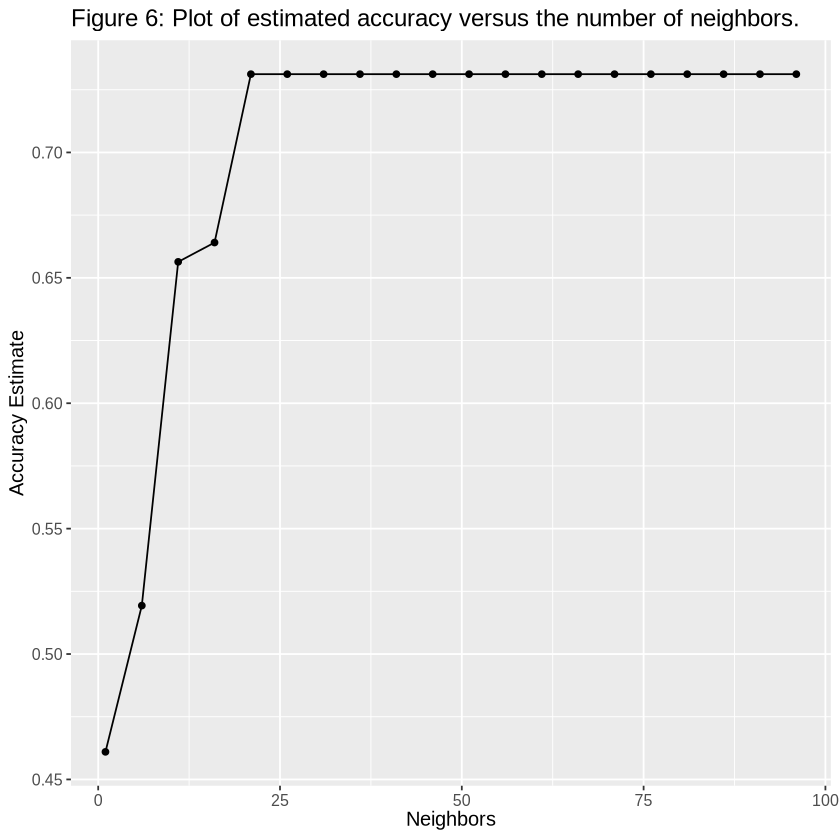

In [31]:
#Visualization of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 6: Plot of estimated accuracy versus the number of neighbors.") +
  theme(text = element_text(size = 12))

accuracy_vs_k

Here we have a graph which finds us the amount of neighbours with the highest accuracy. We can also calculate it programmatically with the next code cell.  

In [18]:
#Find our best K
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 21

Here we see that the ideal number of neighbours is 21 so we will repeat the analysis from Section 1 again but with neighbours set to 21.

In [19]:
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_train) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

# Specify KNN model with tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> # k = 31
  set_engine("kknn") |>
  set_mode("classification")

#fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

In [32]:
#Find accuracy
cat("Result 5: Accuracy of Predictions for Cross Validated Model\n")

players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

Result 5: Accuracy of Predictions for Cross Validated Model


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.755102


In [34]:
#Find prediction 
cat("Result 6: Precision of Predictions for Cross Validated Model\n")

players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level="first")

Result 6: Precision of Predictions for Cross Validated Model


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


In [35]:
#Find recall 
cat("Result 7: Recall of Predictions for Cross Validated Model\n")

players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level="first")

Result 7: Recall of Predictions for Cross Validated Model


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


In [36]:
cat("Result 8: Confusion Matrix for Cross Validated Model\n")
confusion_matrix <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion_matrix

Result 8: Confusion Matrix for Cross Validated Model


          Truth
Prediction TRUE FALSE
     TRUE    36    12
     FALSE    0     1

### **Results (2)**

Our predictive power has improved by a lot. Before, Accuracy was 0.4489796, Precision was 0.8, Recall was 0.3333333. Now, we have Accuracy at 0.755102, Precision at 0.75, and Recall at 1. 

## **Discussion**

### **Findings**

The objective of our KNN analysis was to determine if a player’s experience level and hours played predict their subscription to a game-related newsletter in the "Players" dataset. After using cross-validation to tune the KNN classification model, accuracy changed from ~45% to ~76%, and recall changed to 1. This suggests that, to an extent, these variables predict newsletter subscription. Crucially, though, there is a strong bias towards predicting the TRUE class. Based on the confusion matrix, which shows 48 TRUE predictions and just 1 FALSE prediction, the model almost exclusively predicts the TRUE class. While the recall of 1 might, at face-value, seem favorable, it is associated with poor discrimination, as the model predicts 12 false positives but only 1 false negative. This is due to class imbalance in the training dataset (73% subscribed and 27% not subscribed) and main dataset. This conclusion is inline with what we learned in class as KNN"may not perform well when classes are imbalanced." (Chapter 6.7 of DSCI 100 Textbook). 


### **Expected vs. Actual Findings**

The findings were largely expected, in light of the subscribed vs non-subscribed player imbalance in the dataset. However, perfect (1) recall for TRUE was an unexpected finding, as was the poor discrimination.

### **Impacts**

When it comes to real-world applications related to UBC’s minecraft server “Plaicraft” project, this model’s strong bias towards predicting the majority class is concerning. This bias might lead to poor game-related marketing, with newsletters being sent to players who are not interested. What’s more, the model problematically passes over non-subscribed players who have been wrongly classified. Both of these consequences have negative impacts on net engagement. 


### **Future Questions and Possible Solutions**

Our findings and results give rise to a number of interesting questions:


1. How can we manage the dataset’s class imbalance?
2. How can we address the model’s poor discrimination ability?
3. How might our model’s predictive potential improve with the inclusion of additional variables, like other player characteristics (e.g. age or gender)?

We propose a number of potential solutions to improve the model:

- Threshold adjustment
- Undersampling the majority class
- Cost-sensitive learning (this penalizes the model for misclassifying FALSE instances).

All of these solutions are based on Awe (2020), Keylabs (2024), Canuma, P. (2023) and Grogan, M but we simply lack the knowledge to implement them into our project. Adding variables like this goes far beyond course content and our own coding knowledge. 


**Next steps:**
If we were to continue with this project we would look into adding advanced techniques like this into the project, learning about issues like this bias has been very interesting and the real world applications of this project present us with a hands on puzzle which would be fun to continue with in the future. 






## **References**

- Awe, O. O. (n.d.). *Handling data imbalance in machine learning*. International Statistical Institute. [Link](https://isi-web.org/sites/default/files/2024-02/Handling-Data-Imbalance-in-Machine-Learning.pdf)

- Canuma, P. (2023, August 7). *How to deal with imbalanced classification and Regression Data*. neptune.ai. [Link](https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data)

- Grogan, M. (n.d.). *How to handle imbalanced data in a classification problem?*. Stack Overflow. [Link](https://stackoverflow.com/questions/76703386/how-to-handle-imbalanced-data-in-a-classification-problem)

- Keylabs: latest news and updates. (2024, November 8). *Handling imbalanced data in classification*. Keylabs. [Link](https://keylabs.ai/blog/handling-imbalanced-data-in-classification/)

- Timbers, T., & Campbell, T. (2024, August 21). *Data Science 100 Textbook*. Data Science. [Link](https://datasciencebook.ca/)

